# Netflix Shows & Movies EDA

In [644]:
# Data manipulation & cleaning
import pandas as pd

# EDA Vis
import matplotlib.pyplot as plt

# Any linear algebra problems
import numpy as np

# NLP - Natural Lang. Toolkit - need this library for movie/show reccomendation
import nltk # Won't usually require this, since you want specific packages, but for installation purposes - is required
from nltk.corpus import stopwords # Corpus - collection of written text
from nltk.tokenize import word_tokenize # To tokenize any relevant strings
from nltk.tokenize import PunktSentenceTokenizer
from nltk.probability import FreqDist # To find frequence of tokens, helpful for various EDA

#SkLearn - Training and test
from sklearn.model_selection import train_test_split

# Saving any model(s)
import joblib

## Also import Make Regression from SkLearn - https://www.codespeedy.com/make_regression-function-in-sklearn-with-python/#:~:text=make_regression%20%28%29%20function%20in%20scikit%20learn%20It%20is,in%20python%20below.%20Code%20in%20Python%20programming%20language

In [645]:
# Downloading all recommended packages for NLTK
#nltk.download() # It's my first time using this library 

In [828]:
# Importing data and create a backup 
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\1. Netflix (Personal Proj) - ML Focus\netflix_titles.csv")
df_backup = df.copy()
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [647]:
df.shape

(8807, 12)

#### Manipulation

In [648]:
# Count amount of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [649]:
# Since null rows won't help us, we should just drop them - we have a backup, so it's okay
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [650]:
# Since null rows have been dropped, the original index will have messed up
# Reset index for new df
df.reset_index(inplace=True)

In [651]:
# Converting date-related data into datetime, to make it formatted to refer to for analysis
# Creating 2 new columns - Year & month, to open more analysis opportunities and more perspectives of date analysis
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

The code above mayn't apply to the end goal of this project, but we can use it for reference in future projects

In [652]:
#df.drop(['index'], axis=1, inplace=True)

In [653]:
# Extracting columns for future reference
cols = df.columns 

In [654]:
# Shape of no null df, we have also have a backup.
df.shape

(5332, 15)

## TV Shows vs Movies - Data Extraction

Further into the notebook we will be looking at a recommendation system - so we need to extract this specific data 

In [655]:
# Distribution of content via type
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

# Resetting index for movie & show data
movies.reset_index(inplace=True)
tv_shows.reset_index(inplace=True)

movies.drop(['index'], axis=1, inplace=True) # Droppping 'Index' column since we just reset and created a new index.
tv_shows.drop(['index'], axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### EDA

In [656]:
# Print columns to get more aspects of the data to analyse
list(cols) # List makes it easier to read

['index',
 'show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added']

#### Distribution Of Movies vs TV Shows

Text(0.5, 1.0, 'Movie vs TV Show - Distribution')

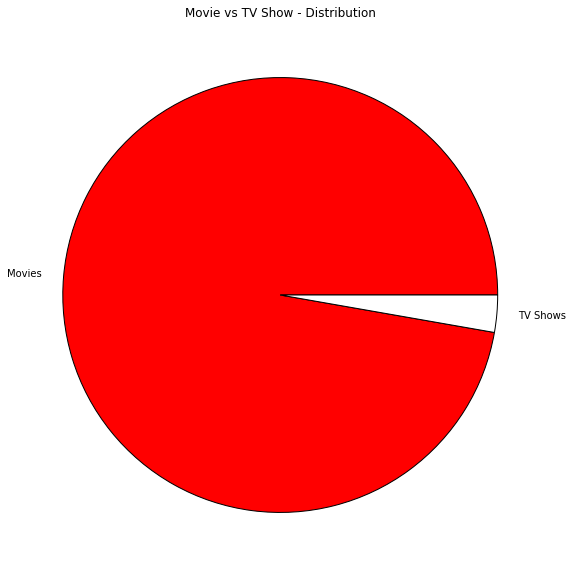

In [657]:
# Distribution Pie
plt.figure(figsize=(15,10))

# Assign values
movies_c = len(movies)
tv_shows_c = len(tv_shows)

labels = ['Movies', 'TV Shows']
plt.pie([movies_c, tv_shows_c], labels=labels, colors= ['red', 'white'], wedgeprops={'edgecolor' :'black'})

plt.title('Movie vs TV Show - Distribution')

#### Content Age Ratings Distribution

In [773]:
# Seperating data into ratings 
ratings_m = [len(movies.loc[movies['rating']== 'TV-14']), len(movies.loc[movies['rating']== 'PG-13']), len(movies.loc[movies['rating']== 'PG']), len(movies.loc[movies['rating']== 'R']),
           len(movies.loc[movies['rating']== 'TV-PG']), len(movies.loc[movies['rating']== 'G']), len(movies.loc[movies['rating']== 'TV-Y7']), len(movies.loc[movies['rating']== 'TV-G']),
           len(movies.loc[movies['rating']== 'TV-Y']),len(movies.loc[movies['rating']== 'NC-17']), len(movies.loc[movies['rating']== 'NR']), len(movies.loc[movies['rating']== 'TV-Y7-FV']), 
           len(movies.loc[movies['rating']== 'UR'])]

ratings_tv = [len(tv_shows.loc[tv_shows['rating']== 'TV-14']), len(tv_shows.loc[tv_shows['rating']== 'PG-13']), len(tv_shows.loc[tv_shows['rating']== 'PG']), len(tv_shows.loc[tv_shows['rating']== 'R']),
           len(tv_shows.loc[tv_shows['rating']== 'TV-PG']), len(tv_shows.loc[tv_shows['rating']== 'G']), len(tv_shows.loc[tv_shows['rating']== 'TV-Y7']), len(tv_shows.loc[tv_shows['rating']== 'TV-G']),
           len(tv_shows.loc[tv_shows['rating']== 'TV-Y']),len(tv_shows.loc[tv_shows['rating']== 'NC-17']), len(tv_shows.loc[tv_shows['rating']== 'NR']), len(tv_shows.loc[tv_shows['rating']== 'TV-Y7-FV']), 
           len(tv_shows.loc[tv_shows['rating']== 'UR'])]

total = len(df)
ratings_name = ['TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7', 'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

## For this cell, NLTK Tokenizing might be better - **ammend at a later point**

In [659]:
ratings_ordered = np.sort(ratings)[::-1]
list(ratings_ordered)

[1214, 778, 470, 431, 275, 84, 76, 76, 58, 40, 3, 3, 2]

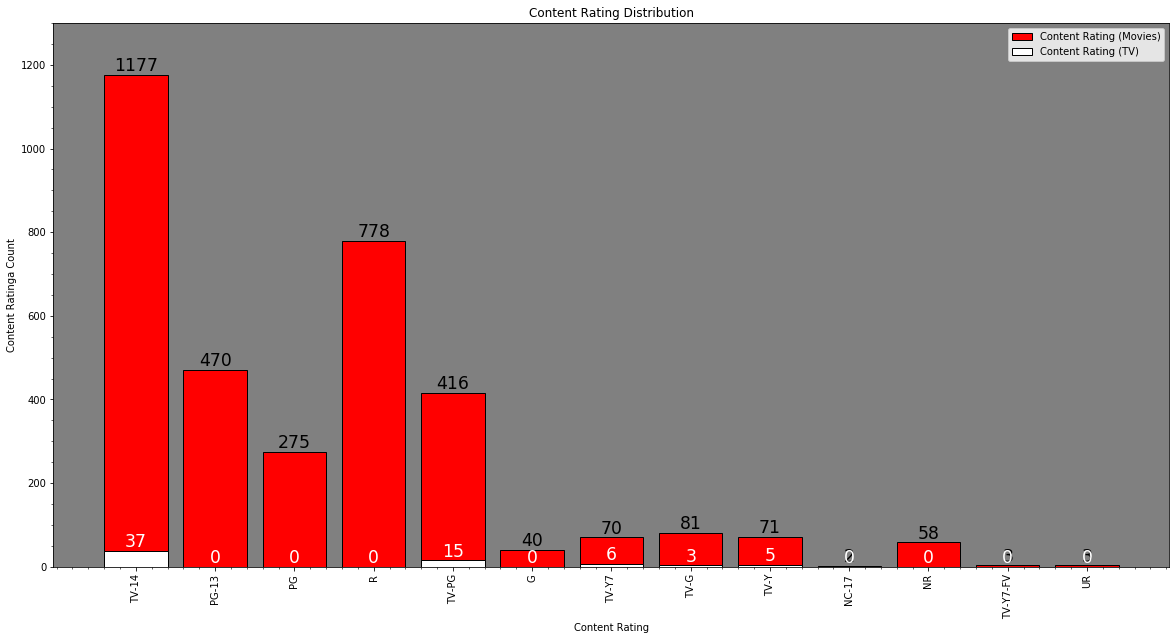

In [797]:
# Bar plots
plt.figure(figsize=(20,10))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

#Plotting bar
mov_rates = plt.bar(ratings_name, ratings_m, color=['red'], label ='Content Rating (Movies)', edgecolor='black')

# Assigning labels on top of the bars
for i in range(len(ratings_name)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,ratings_m[i], ratings_m[i], ha="center", va="bottom", color='black', fontsize='xx-large')
    
tv_show_rates = plt.bar(ratings_name, ratings_tv, color=['white'], label ='Content Rating (TV)', edgecolor='black')


# Assigning labels to axes
plt.xlabel('Content Rating')
plt.xticks(ratings_name, rotation='vertical')
plt.ylabel('Content Ratinga Count')
plt.yticks()
plt.minorticks_on()
plt.title('Content Rating Distribution')
plt.ylim([0,1300]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(ratings_name)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,ratings_tv[i], ratings_tv[i], ha="center", va="bottom", color='white', fontsize='xx-large')

##Present Data
plt.legend()
plt.show()

### Top 10 Movie Genres

In [705]:
movies.head(3)

,level_0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
1,2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
2,3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [717]:
# We want to look at the description of the movies
# Since we want to tokenize the words, we need to convert the column into dtye: string

#This method allows you to convert the columns into one long string, as needed for the word_tokenize function
mov_desc = movies.listed_in.str.cat(sep=' ')
tv_desc = tv_shows.listed_in.str.cat(sep=' ')

In [718]:
# Now that we have the column as one long string, we can tokenize the words
mov_desc_tokens = word_tokenize(mov_desc)
len(mov_desc_tokens)

26882

In [799]:
tv_desc_tokens = word_tokenize(tv_desc) # 
len(tv_desc_tokens)

1218

#### Let's filter the tokens

In [720]:
# We will call this variable for filtering the tokens
stop_words = set(stopwords.words('english')) # 'english' is the default English word recognition by NLTK
## Modify the stopwords - search it up - remove punctuation

In [721]:
f_mov_desc_tokens = [] # Filtering Movie tokens to just English words
for w in mov_desc_tokens:  # For loop iterates through the entire TV Show token list
    if w not in stop_words:  # Finding any words not in the English 'Stop words'
        f_mov_desc_tokens.append(w) # Appends the new variable with just those tokens that meeting NLTK's English tokens

f_tv_desc_tokens = [] # Filtering TV-Show tokens to just English words
for w in tv_desc_tokens: # For loop iterates through the entire TV Show token list
    if w not in stop_words: # Finding any words not in the English 'Stop words'
        f_tv_desc_tokens.append(w) # Appends the new variable with just those tokens that meeting NLTK's English tokens

In [722]:
len(f_mov_desc_tokens)

26882

In [801]:
len(f_tv_desc_tokens)

1218

The length of the tokens are the same, but the non-english words or words that don't help our analysis are removed.

In [802]:
# Gathering frequency of token occurence

 # Variable to contain to function for this specific use
freq_m_d_t = FreqDist() # Movies

freq_tv_d_t = FreqDist() # TV Shows


In [803]:
# Loop to count occurence of each token - Movies
for word in f_mov_desc_tokens:
    freq_m_d_t[word.lower()]+=1 # "+=1" - increases count of each occurence by 1
freq_m_d_t 

FreqDist({',': 6306, 'movies': 4960, 'international': 2369, 'dramas': 2293, '&': 1895, 'comedies': 1553, 'action': 806, 'adventure': 806, 'independent': 740, 'romantic': 579, ...})

In [804]:
#Length of the unique values in the description 
# Movie tokens
len(freq_m_d_t)

29

In [805]:
# Loop to count occurence of each token - Movies
for word in tv_desc_tokens:
    freq_tv_d_t[word.lower()]+=1
freq_tv_d_t

FreqDist({'tv': 332, ',': 220, 'shows': 206, 'international': 87, 'dramas': 52, 'crime': 38, '&': 32, 'comedies': 30, 'british': 21, 'romantic': 21, ...})

In [806]:
#Length of the unique values in the description 
# TV Show tokens
len(freq_tv_d_t)

33

      TOTAL TOKENS       
      _________________
    - Movies : 26882   
    - TV Shows : 1218  
    
      UNIQUE TOKENS          
      _________________
    - Movies : 29        
    - TV Shows : 33  

In [807]:
# Variable to store the top 'x' most common tokens
freq_mdt_t10 = freq_m_d_t.most_common(16)
freq_mdt_t10

[(',', 6306),
 ('movies', 4960),
 ('international', 2369),
 ('dramas', 2293),
 ('&', 1895),
 ('comedies', 1553),
 ('action', 806),
 ('adventure', 806),
 ('independent', 740),
 ('romantic', 579),
 ('thrillers', 547),
 ('children', 503),
 ('family', 503),
 ('documentaries', 391),
 ('horror', 336),
 ('stand-up', 294)]

In [808]:
freq_tvdt_t10 = freq_tv_d_t.most_common(16)
freq_tvdt_t10

[('tv', 332),
 (',', 220),
 ('shows', 206),
 ('international', 87),
 ('dramas', 52),
 ('crime', 38),
 ('&', 32),
 ('comedies', 30),
 ('british', 21),
 ('romantic', 21),
 ('docuseries', 14),
 ('action', 13),
 ('adventure', 13),
 ('kids', 13),
 ("'", 13),
 ('stand-up', 11)]

We can focus on actual genres, the genres we're going to plot are:

      MOVIES                  TV SHOWS
      ____________________________________
    - International: 2369   - International: 87  
    - Dramas : 2293         - Dramas : 52
    - Comedy : 1553         - Crime : 38
    - Action : 806          - Comedy : 30
    - Adventure : 806       - British : 21
    - Romantic : 579        - Romantic : 21
    - Thrillers : 547       - Docuseries : 14
    - Family : 503          - Action : 13
    - Documentaries : 391   - Adventure : 13
    - Horror : 336          - Kids : 13
    
We can ignore some of the values since they aren't genres...

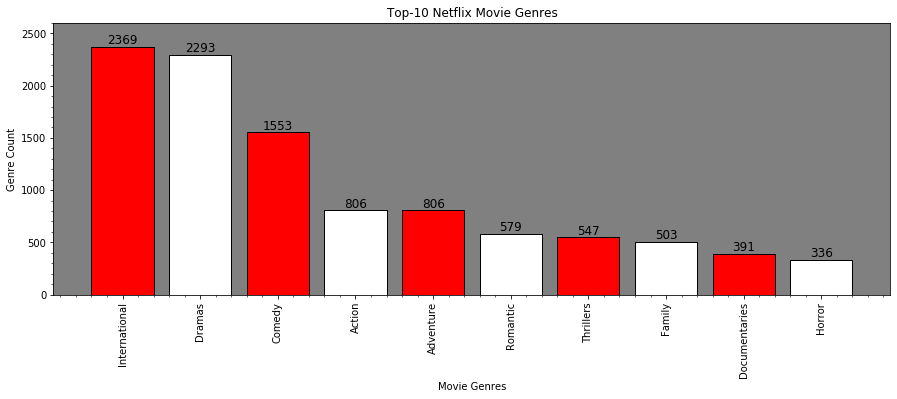

In [809]:
# Plotting 1st Bar Graph - Movie Genres

# Contain values
mov_genres_x = ['International', 'Dramas', 'Comedy', 'Action', 'Adventure', 'Romantic', 'Thrillers', 'Family', 'Documentaries', 'Horror']
mov_values_y = [2369,2293,1553,806,806,579,547,503,391,336]

# Set bar size and background
plt.figure(figsize=(15,5))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Plot data
mov_bar_genre_freq10 = plt.bar(mov_genres_x, mov_values_y, label = 'Top 10 Genres (Movies)', color =['red','white'], edgecolor=['black'])

# Assigning values to graph axes
plt.yticks()
plt.ylabel('Genre Count')
plt.xticks(mov_genres_x, rotation= 'vertical')
plt.xlabel('Movie Genres')
plt.minorticks_on()
plt.title('Top-10 Netflix Movie Genres')
plt.ylim([0,2600]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(mov_genres_x)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,mov_values_y[i], mov_values_y[i], ha="center", va="bottom", color='black', fontsize='large')



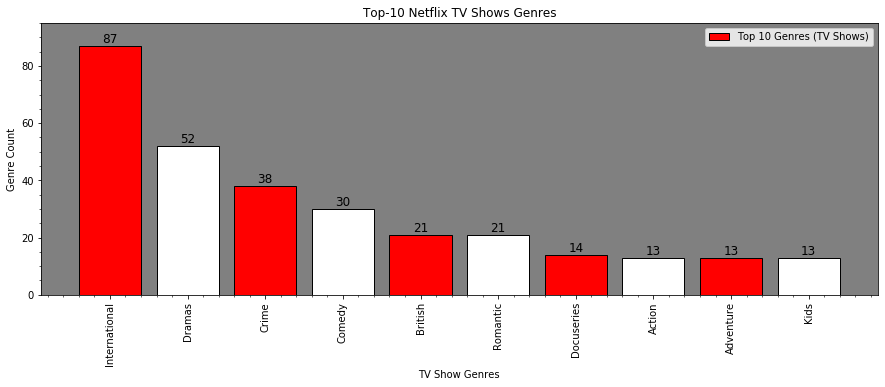

In [810]:
# Plotting 2nd Bar Graph - TV Show Genres

# Contain Values
tvs_genres_x = ['International','Dramas','Crime','Comedy','British','Romantic','Docuseries','Action','Adventure','Kids']
tvs_values_y = [87,52, 38, 30, 21, 21, 14, 13, 13, 13]

# Setgraph size and background
plt.figure(figsize=(15,5))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Plot graph
tv_bar_genre_freq10 = plt.bar(tvs_genres_x, tvs_values_y, label = 'Top 10 Genres (TV Shows)', color =['red','white'], edgecolor=['black'])

# Assigning values to graph axes
plt.yticks()
plt.ylabel('Genre Count')
plt.xticks(tvs_genres_x, rotation= 'vertical')
plt.xlabel('TV Show Genres')
plt.minorticks_on()
plt.title('Top-10 Netflix TV Shows Genres')
plt.ylim([0,95]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(tvs_genres_x)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i, tvs_values_y[i], tvs_values_y[i], ha="center", va="bottom", color='black', fontsize='large')
    
##Present Data
plt.legend()
plt.show(mov_bar_genre_freq10,  tv_bar_genre_freq10)


### Content By Country

In [811]:
# Extracting Country Data
countries_m = movies['country']
countries_tv = tv_shows['country']

In [812]:
# Convert both to strings
countries_m_s = countries_m.str.cat(sep=' ')
countries_tv_s = countries_tv.str.cat(sep=' ') # split by the comma after country

In [813]:
# Splitting strings into names 
countries_m_s_split = countries_m_s.split(',') # The split() function is better for this situation, tokenize would tokenize the first
countries_tv_s_split = countries_tv_s.split(',') # and last names of the actors - not helpful for this analysis.

In [814]:
stop_words = set(stopwords.words("english"))

#### Get help from Shanghua ^^^


In [815]:
# Countries, Movies - Filter
filt_countries_ms = []
for w in countries_m_s_split:
    if w not in stop_words:
        filt_countries_ms.append(w)
        
# Countries, Movies = Filter
filt_countries_tvs = []

for w in countries_tv_s_split:
    if w not in stop_words:
        filt_countries_tvs.append(w)

### EDA On Actor Data 

#### *find new title for this segment*

In [816]:
# Extracting cast data
actors_m = movies['cast']
actors_tv = tv_shows['cast']

In [817]:
# Convert data into a str
actors_m_s = actors_m.str.cat(sep=' ')
actors_tv_s = actors_tv.str.cat(sep=' ')

In [818]:
# Splitting strings into names 
actors_m_s_split = actors_m_s.split(',') # The split() function is better for this situation, tokenize would tokenize the first
actors_tv_s_split = actors_tv_s.split(',') # and last names of the actors - not helpful for this analysis.

In [819]:
# Movie Actors - Filter
filt_actors_ms = []

for w in actors_m_s_split:
    if w not in stop_words:
        filt_actors_ms.append(w)
        
# TV Actors - Filter
filt_actors_tvs = []

for w in actors_tv_s_split:
    if w not in stop_words:
        filt_actors_tvs.append(w)

In [820]:
 # Assign FreqDist() function to a variable to store the most common actors for TV Shows and Movies
freq_actors_m = FreqDist()
freq_actors_tv = FreqDist()

In [821]:
# Counting actor appearances - Movies
for word in filt_actors_tvs:
    freq_actors_m[word.lower()]+=1

# Counting actor appearances - TV Shows
for word in filt_countries_tvs:
    freq_actors_tv[word.lower()]+=1


In [822]:
# Most common actors - Movies
freq_mact_t10 = freq_actors_m.most_common(10)

# Most common actors - TV Shows
freq_tvact_t10 = freq_actors_tv.most_common(10)
freq_mact_t10

[(' maxi iglesias', 2),
 (' prakash raj', 2),
 (' gautham vasudev menon', 2),
 (' anjali', 2),
 (' john boyega', 2),
 (' hsia teng-hung', 2),
 (' katie mcgrath', 2),
 (' young dais', 2),
 (' river huang', 2),
 (' bae doona', 2)]

#### Create a stacked bar chart:

Look at the most commonly appreating actors (top 10) on Netlix's platform and then look at the actual top 10 actors from IDMB.


This will allow us to see how many times the actual top 10 actors appear on Netlix's platform

## Recommendation System - NLTK

In this section we will be creating an algorithm that recommends movies and shows, relevant to what the viewer is watching.

In [689]:
# Calling Movie & TV Show data
## We will only require some of the data here, so we'll slice it further
movies_rec = movies[['title','director','country','listed_in', 'description']]